import 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('bank.csv')


In [5]:
df.head(100)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,37,management,divorced,tertiary,122,yes,no,unknown,19,may,1622,2,-1,0,yes
96,30,technician,single,tertiary,880,yes,yes,unknown,19,may,967,6,-1,0,yes
97,41,technician,married,secondary,501,yes,no,unknown,19,may,579,5,-1,0,yes
98,36,blue-collar,married,secondary,4438,yes,no,unknown,20,may,446,1,-1,0,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   balance    11162 non-null  int64 
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   contact    11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  deposit    11162 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [7]:
def check_and_drop_column(df, column):
    if df[column].eq(df[column].iloc[0]).all():
        df = df.drop(column, axis=1)
    else:
        print('your data not same')
    return df


In [8]:
check_and_drop_column(df,'deposit')

your data not same


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,cellular,20,apr,257,1,-1,0,no
11158,39,services,married,secondary,733,no,no,unknown,16,jun,83,4,-1,0,no
11159,32,technician,single,secondary,29,no,no,cellular,19,aug,156,2,-1,0,no
11160,43,technician,married,secondary,0,no,yes,cellular,8,may,9,2,172,5,no


In [9]:
(df['previous']).unique().sum()

np.int64(647)

In [10]:
(df['contact'] != 'unknown').unique()

array([False,  True])

In [11]:
df.drop(['day','month',], axis=1 ,inplace=True)

In [12]:
df.drop(['contact'], axis=1 ,inplace=True)

In [13]:
df.drop(['outlier'], axis=1 ,inplace=True)

KeyError: "['outlier'] not found in axis"

In [14]:
def chek_data(df) :
   dattype =  df.dtypes
   num_un = df.nunique()
   return pd.DataFrame( {'data type' : dattype,'numbers_uniq ':num_un}).T 

In [15]:
chek_data(df)

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,deposit
data type,int64,object,object,object,int64,object,object,int64,int64,int64,int64,object
numbers_uniq,76,12,3,4,3805,2,2,1428,36,472,34,2


In [16]:
cols = ['job','marital','education','housing','loan','deposit']
df[cols] = df[cols].astype('category')

In [17]:
for col in df.columns :
    df = check_and_drop_column(df,col)

your data not same
your data not same
your data not same
your data not same
your data not same
your data not same
your data not same
your data not same
your data not same
your data not same
your data not same
your data not same


In [18]:
chek_data(df)

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,deposit
data type,int64,category,category,category,int64,category,category,int64,int64,int64,int64,category
numbers_uniq,76,12,3,4,3805,2,2,1428,36,472,34,2


In [19]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

In [20]:
(df['age'] >= 65).sum()

np.int64(425)

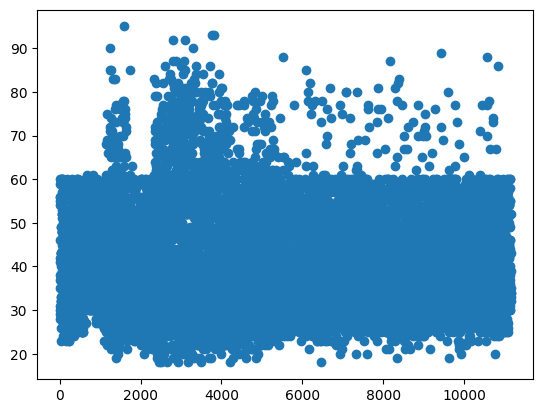

In [21]:
plt.scatter(range(len(df['age'])), df['age'])


<Axes: >

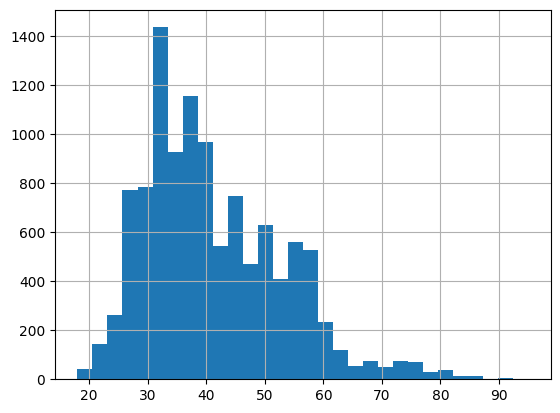

In [22]:
df['age'].hist(bins=30)


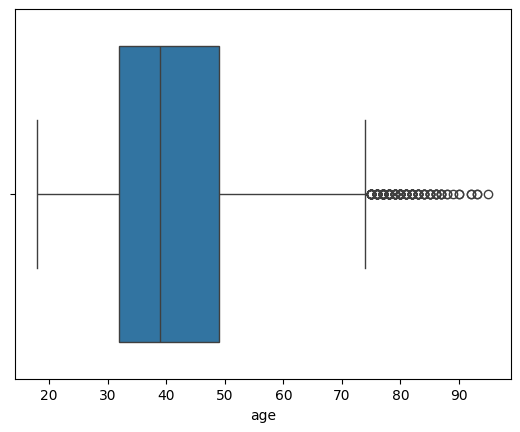

In [23]:


sns.boxplot(x=df['age'])
plt.show()


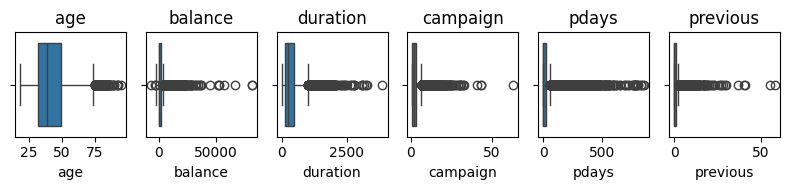

In [24]:


num_col = df.select_dtypes('number').columns
plt.figure(figsize=(8, 2))  

for i, col in enumerate(num_col):
    plt.subplot(1, len(num_col), i+1)
    sns.boxplot(x=df[col], orient="h")
    plt.title(col)

plt.tight_layout()
plt.show()


<Axes: xlabel='age'>

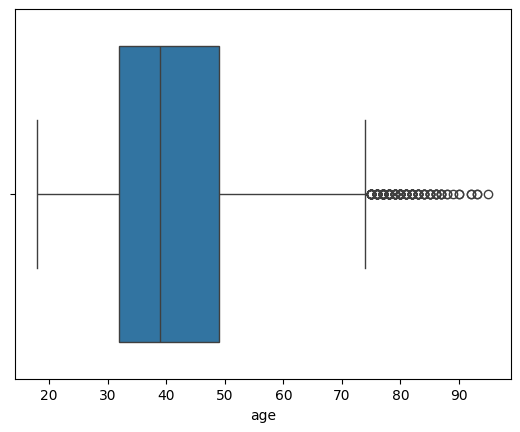

In [25]:
sns.boxplot(x=df['age'])


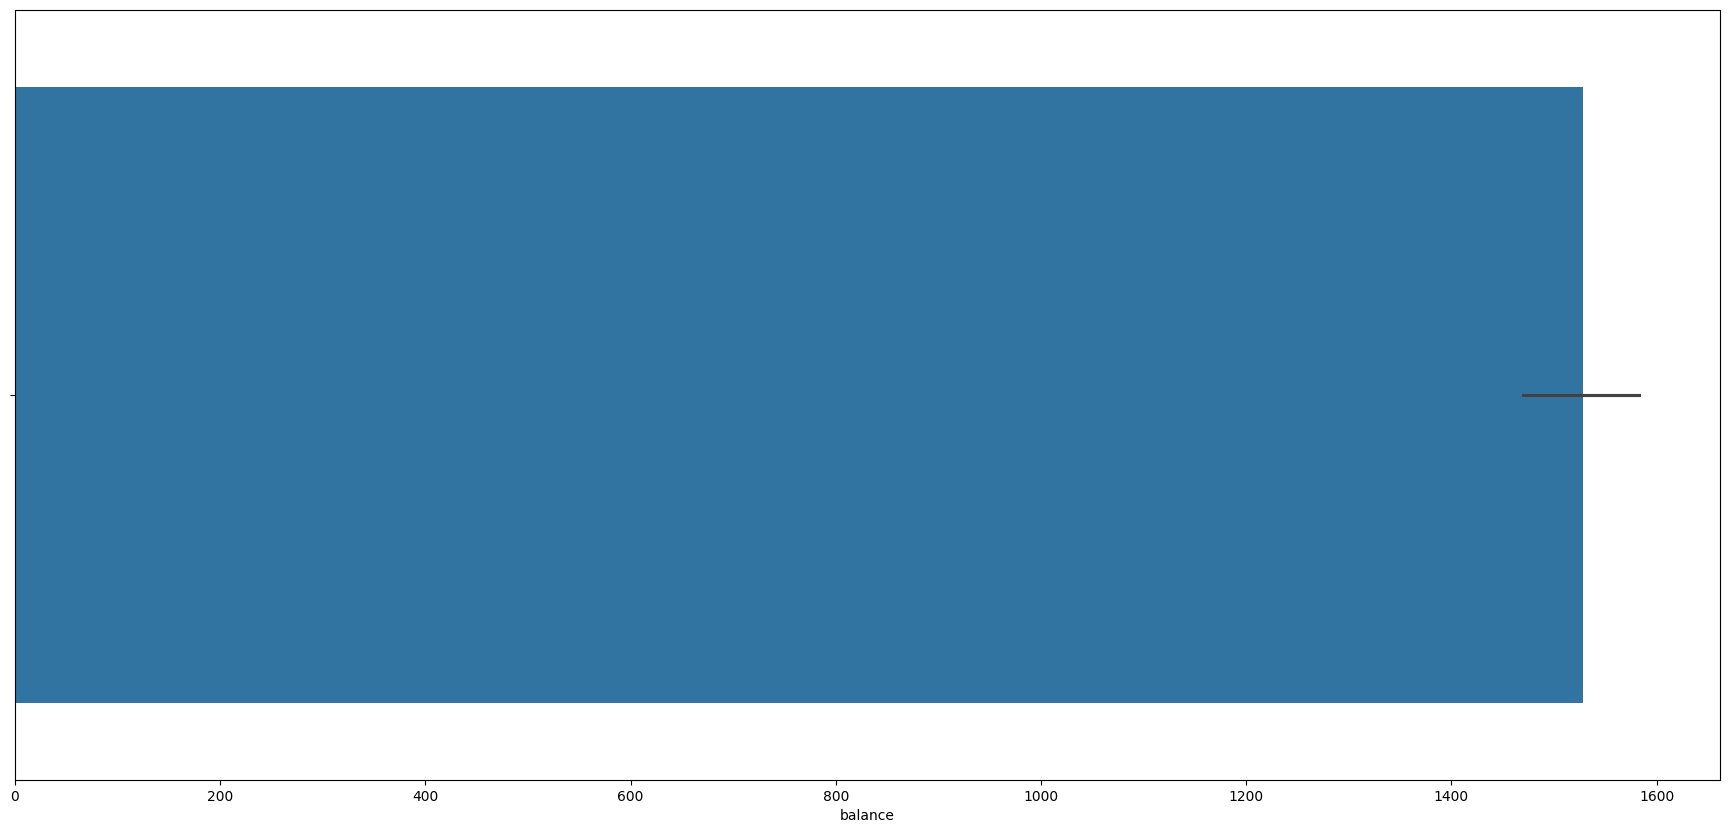

In [26]:
plt.figure(figsize=(22,10))

sns.barplot(x=df['balance'])
plt.show()

In [27]:
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR

    lower_Outliers = df[df[col] < Lower_Fence][col].values
    upper_Outliers = df[df[col] > Upper_Fence][col].values

    df[col].replace(lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(upper_Outliers, Upper_Fence, inplace=True)


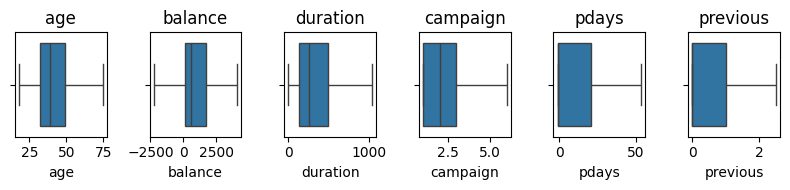

In [28]:


num_col = df.select_dtypes('number').columns
plt.figure(figsize=(8, 2))  

for i, col in enumerate(num_col):
    plt.subplot(1, len(num_col), i+1)
    sns.boxplot(x=df[col], orient="h")
    plt.title(col)

plt.tight_layout()
plt.show()


In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(12,2))
n = len(num_cols)
for i , col in enumerate(num_cols):
    plt.subplot(1,n,figsize=(5*n,4))
    plt.hist(df[col])
plt.show()    

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 1200x200 with 0 Axes>

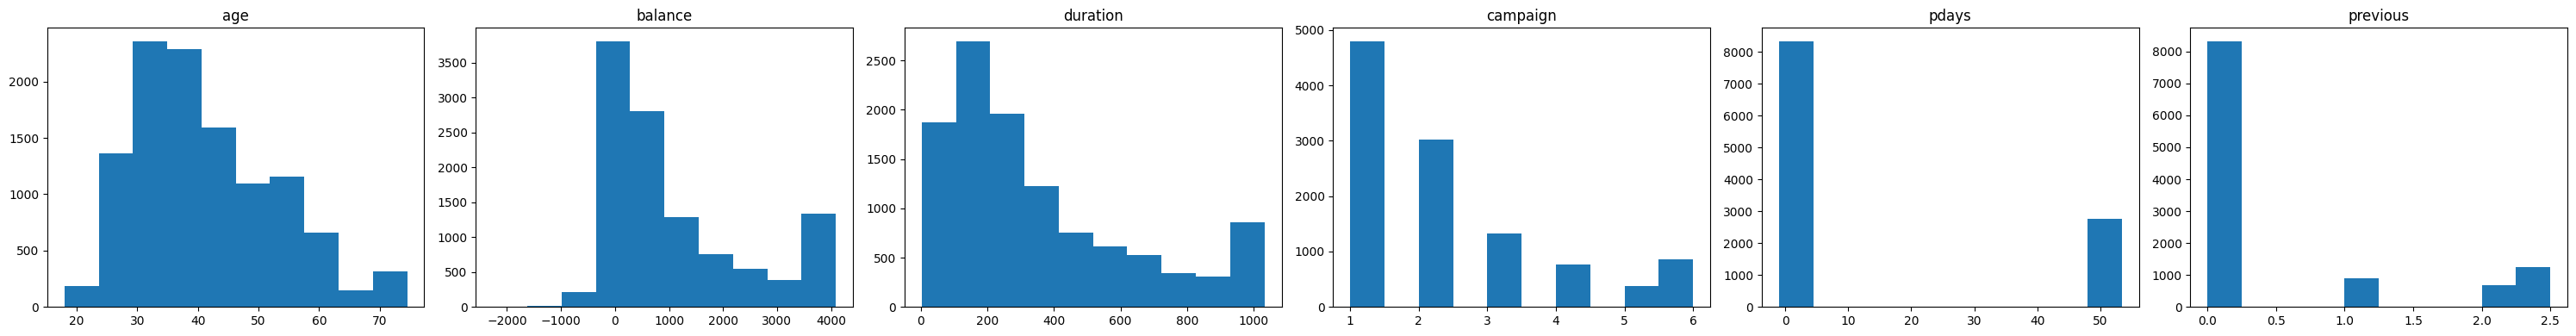

In [31]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes('number').columns
n = len(num_cols)

fig, axes = plt.subplots(1, n, figsize=(5*n, 4))  

if n == 1:
    axes = [axes]

for i, col in enumerate(num_cols):
    axes[i].hist(df[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


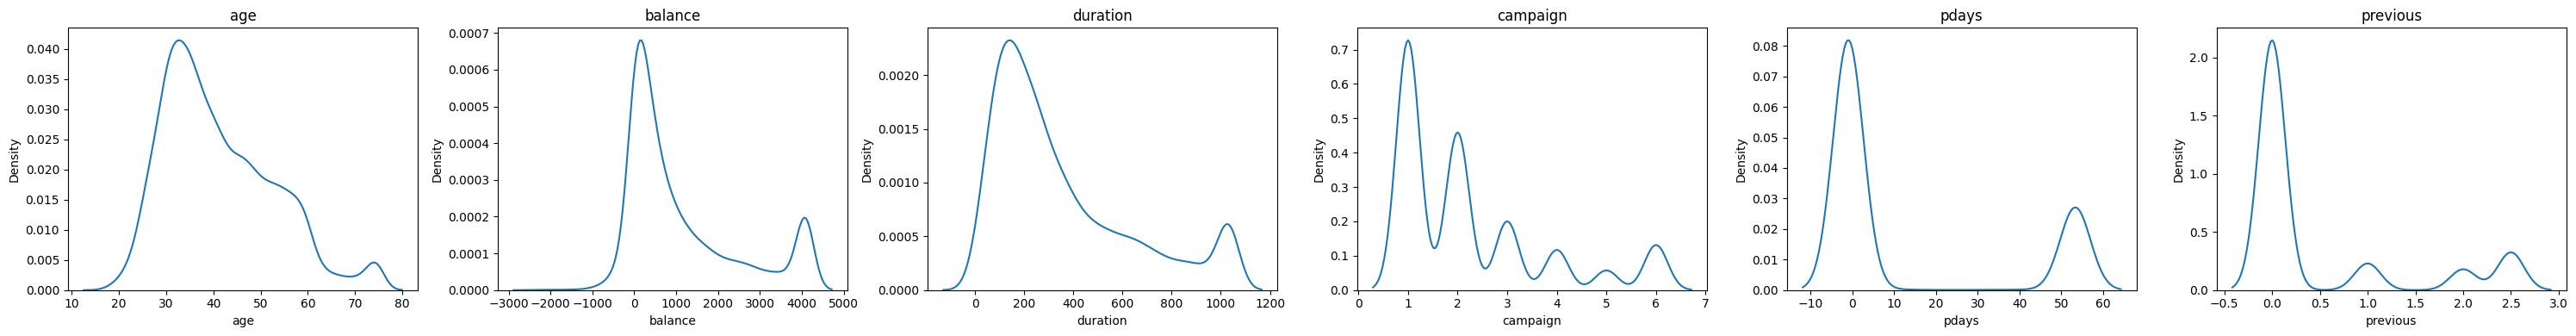

In [ ]:
import seaborn as sns

num_cols = df.select_dtypes('number').columns
n = len(num_cols)

fig, axes = plt.subplots(1, n, figsize=(5*n, 4))

if n == 1:
    axes = [axes]

for i, col in enumerate(num_cols):
    sns.kdeplot(df[col], ax=axes[i])  
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


In [32]:
cat_colum = df.select_dtypes('category').columns
cat_colum

Index(['job', 'marital', 'education', 'housing', 'loan', 'deposit'], dtype='object')

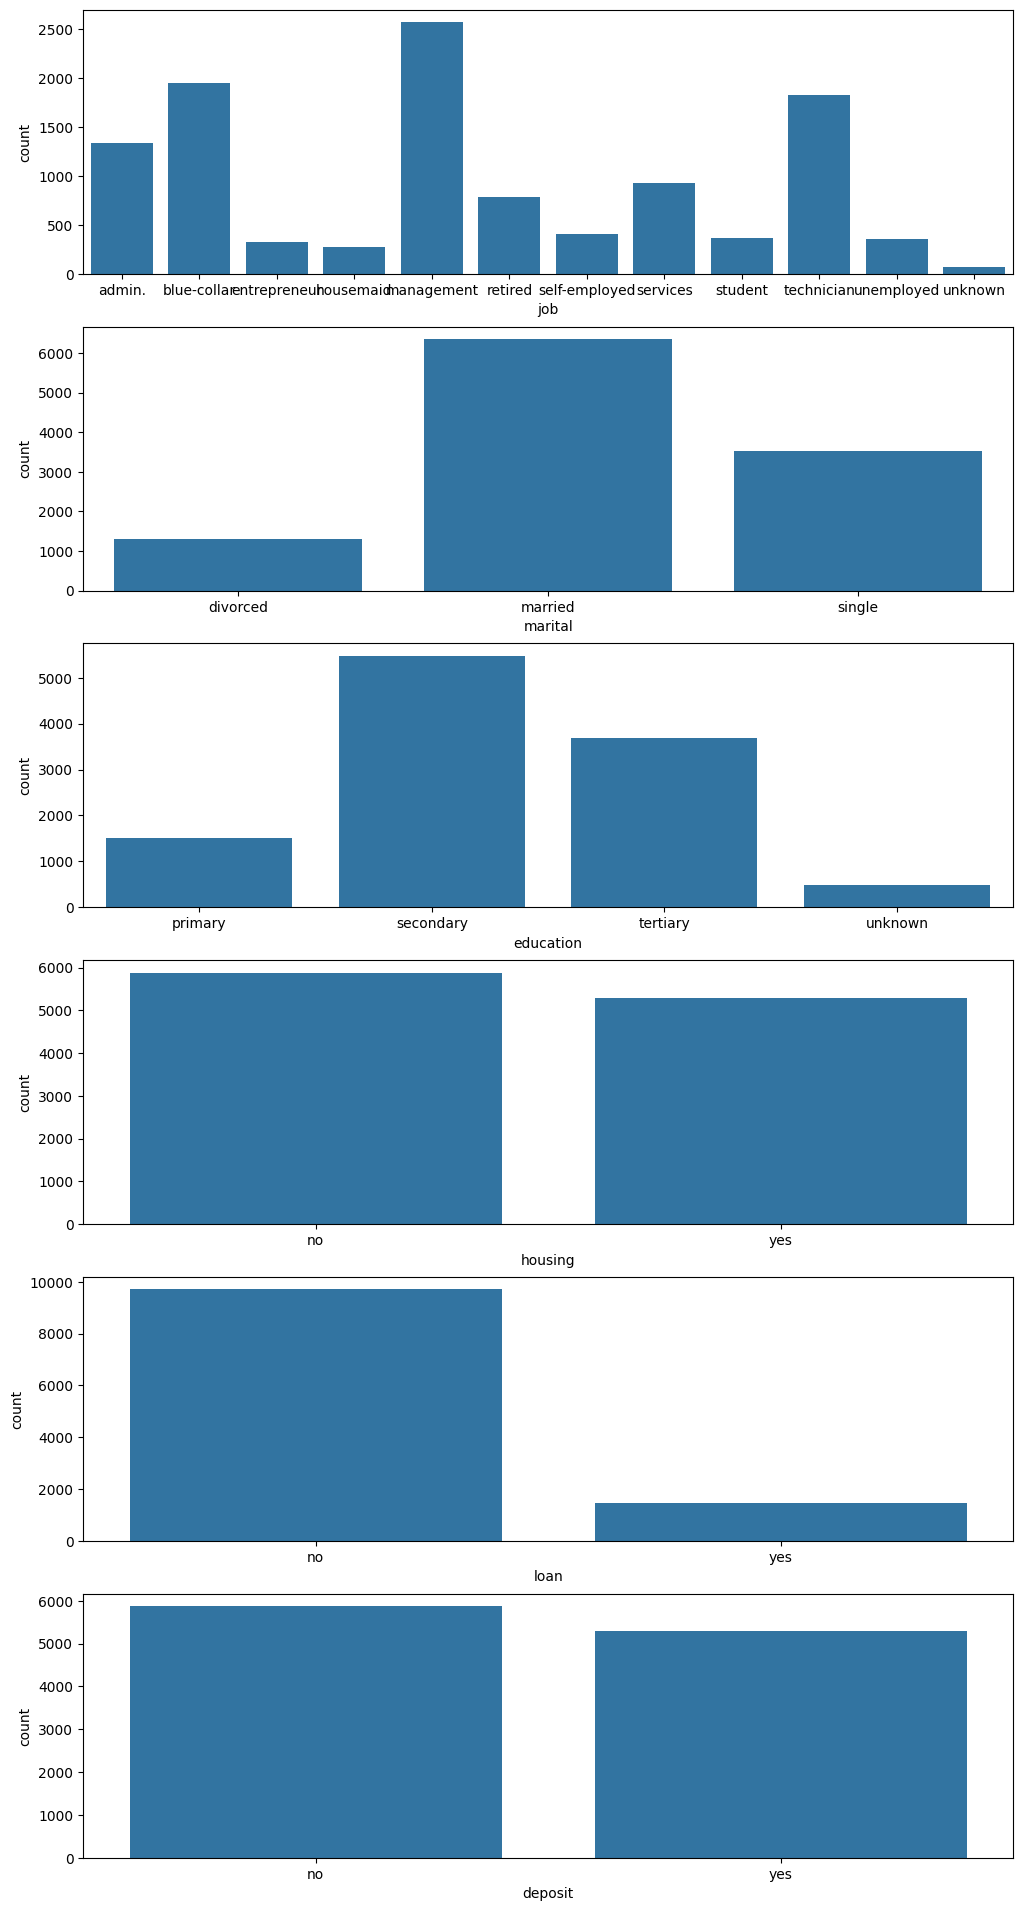

In [33]:
cat_colum = df.select_dtypes('category').columns
plt.figure(figsize=(12, len(cat_colum)*4))
for i,col in enumerate(cat_colum):
    plt.subplot(len(cat_colum),1,i+1)
    sns.countplot(x=col , data=df)
plt.show()    


In [34]:
unique = df[col].value_counts()
unique

deposit
no     5873
yes    5289
Name: count, dtype: int64

AttributeError: 'numpy.ndarray' object has no attribute 'index'

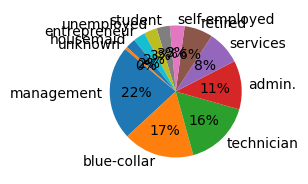

In [35]:
cat_colum = df.select_dtypes('category').columns
plt.figure(figsize=(12, len(cat_colum)*2.5))
for i ,col in enumerate(cat_colum) :
    plt.subplot(len(cat_colum),1,i+1)
    unique = df[col].value_counts()
    count = unique.values
    categors = unique.index
    plt.pie(count,labels=categors,startangle=140,autopct='%1.1d%%')
    plt.legend(labels=count.index, bbox_to_anchor=(1, 0.5))
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')

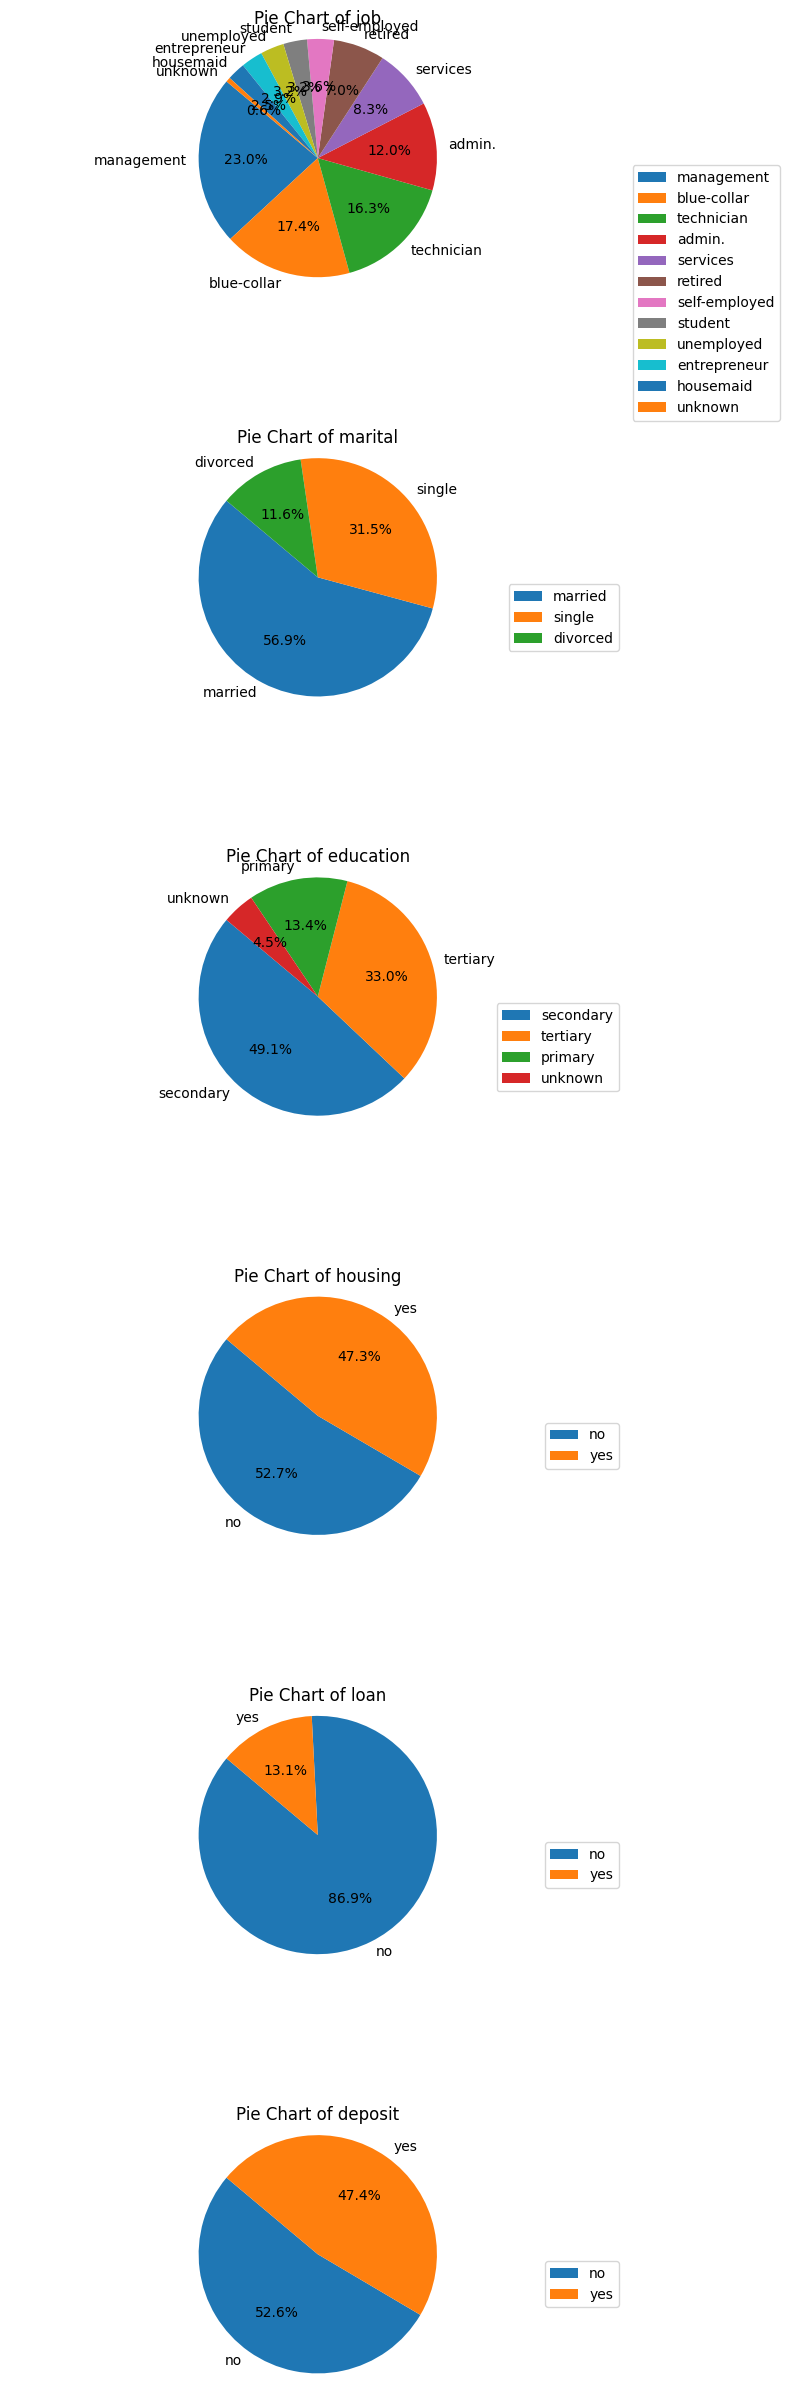

In [36]:
import matplotlib.pyplot as plt

cat_colum = df.select_dtypes('category').columns
n = len(cat_colum)

plt.figure(figsize=(8, n*4))  

for i, col in enumerate(cat_colum):
    plt.subplot(n, 1, i+1)
    counts = df[col].value_counts()
    
    plt.pie(counts.values,
            labels=counts.index,      
            startangle=140,
            autopct='%.1f%%')           
    
    plt.legend(labels=counts.index, bbox_to_anchor=(1, 0.5))  
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')  

plt.tight_layout()
plt.show()


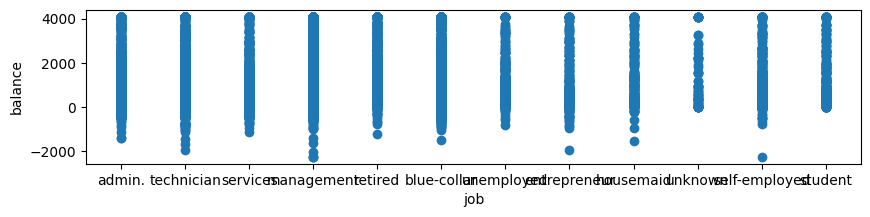

In [37]:
plt.figure(figsize=(10,2))
plt.scatter(df['job'],df['balance'])
plt.xlabel('job')
plt.ylabel('balance')
plt.show()

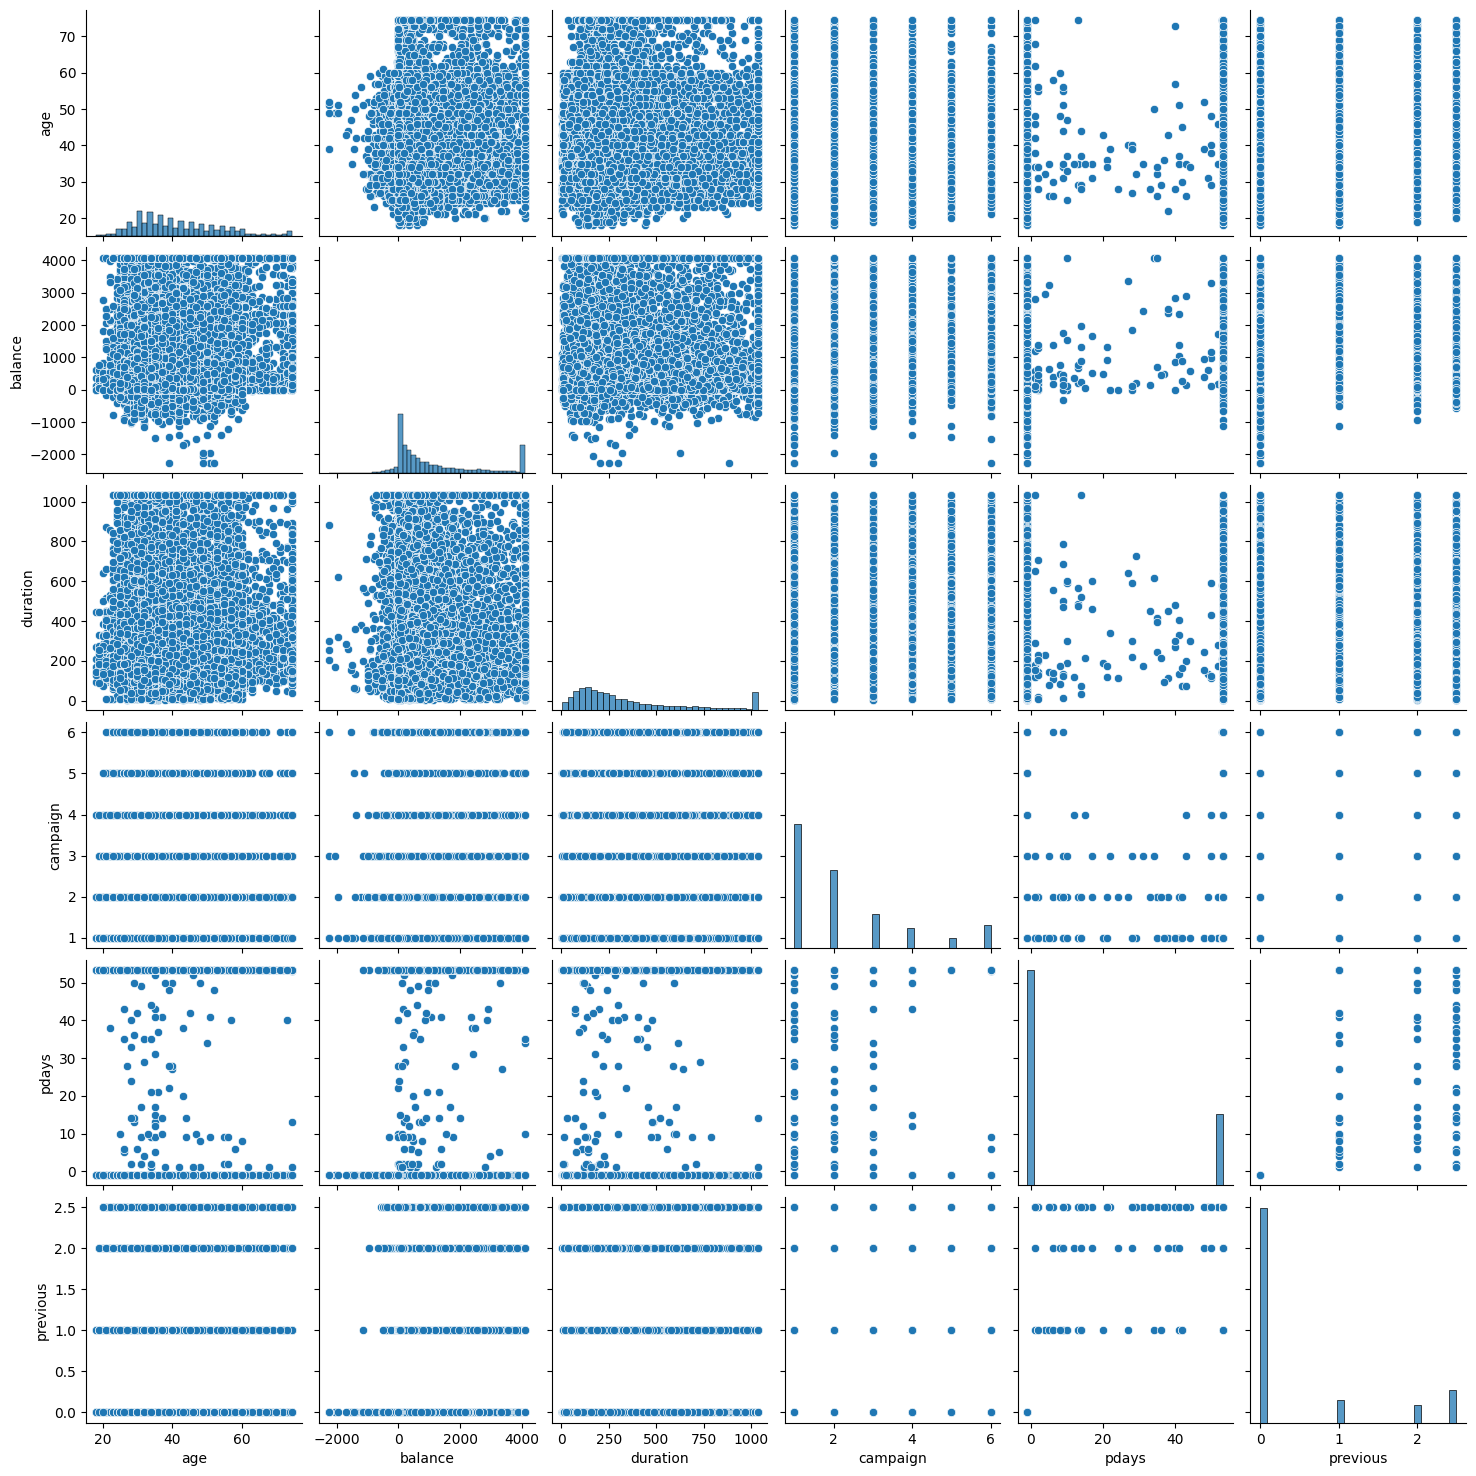

In [38]:
sns.pairplot(df)

In [67]:
import plotly.express as px
import plotly.graph_objects as go

In [39]:
corr = df[num_cols].corr()
corr

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.137379,-0.000018,0.002732,0.026717,0.032912
balance,0.137379,1.000000,0.042808,-0.032775,0.076411,0.071769
duration,-0.000018,0.042808,1.000000,-0.023626,-0.032356,-0.031185
campaign,0.002732,-0.032775,-0.023626,1.000000,-0.140442,-0.113908
pdays,0.026717,0.076411,-0.032356,-0.140442,1.000000,0.922183
previous,0.032912,0.071769,-0.031185,-0.113908,0.922183,1.000000


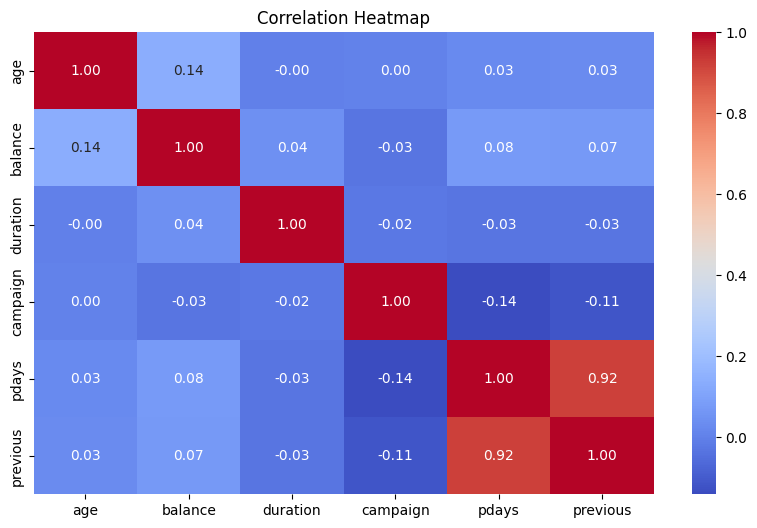

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [41]:
df.head(5)

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,deposit
0,59.0,admin.,married,secondary,2343,yes,no,1033,1,-1.0,0.0,yes
1,56.0,admin.,married,secondary,45,no,no,1033,1,-1.0,0.0,yes
2,41.0,technician,married,secondary,1270,yes,no,1033,1,-1.0,0.0,yes
3,55.0,services,married,secondary,2476,yes,no,579,1,-1.0,0.0,yes
4,54.0,admin.,married,tertiary,184,no,no,673,2,-1.0,0.0,yes


In [84]:
fig = px.pie(data_frame=df,names='education',color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()

In [82]:
fig = px.pie(df, names='education', values='balance',
             title='Total Balance per Education Level',
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()


In [90]:
fig = px.pie(data_frame=df
             ,names='deposit',
             color_discrete_sequence=px.colors.qualitative.T10_r,
             hole=0.5)
fig.show() 

In [102]:
fig = px.pie(df,names='job',
              values='balance'
              ,color_discrete_sequence=px.colors.qualitative.Dark24_r,
              hole=.4) 

fig

In [111]:
fig = px.histogram(df,x='balance'
                   ,color='deposit'
                   ,color_discrete_map={'yes':'green','no':'red'},
                   barmode='group')
fig

In [ ]:
fig = px.histogram(df , x='')

In [43]:
x = df.drop('deposit',axis=1)
y = df['deposit']


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   balance    11162 non-null  int64  
 5   housing    11162 non-null  object 
 6   loan       11162 non-null  object 
 7   contact    11162 non-null  object 
 8   duration   11162 non-null  int64  
 9   campaign   11162 non-null  int64  
 10  pdays      11162 non-null  float64
 11  previous   11162 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 1.0+ MB


In [ ]:
x

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous
0,59.0,admin.,married,secondary,2343,yes,no,unknown,1033,1,-1.000,0.0
1,56.0,admin.,married,secondary,45,no,no,unknown,1033,1,-1.000,0.0
2,41.0,technician,married,secondary,1270,yes,no,unknown,1033,1,-1.000,0.0
3,55.0,services,married,secondary,2476,yes,no,unknown,579,1,-1.000,0.0
4,54.0,admin.,married,tertiary,184,no,no,unknown,673,2,-1.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,1,yes,no,cellular,257,1,-1.000,0.0
11158,39.0,services,married,secondary,733,no,no,unknown,83,4,-1.000,0.0
11159,32.0,technician,single,secondary,29,no,no,cellular,156,2,-1.000,0.0
11160,43.0,technician,married,secondary,0,no,yes,cellular,9,2,53.375,2.5


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


In [45]:
from sklearn.preprocessing import MinMaxScaler
numcols = x.select_dtypes('number').columns
scaler = MinMaxScaler()
X_train[numcols] = scaler.fit_transform(X_train[numcols])
X_test[numcols] = scaler.transform(X_test[numcols])


In [46]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        11162 non-null  float64 
 1   job        11162 non-null  category
 2   marital    11162 non-null  category
 3   education  11162 non-null  category
 4   balance    11162 non-null  int64   
 5   housing    11162 non-null  category
 6   loan       11162 non-null  category
 7   duration   11162 non-null  int64   
 8   campaign   11162 non-null  int64   
 9   pdays      11162 non-null  float64 
 10  previous   11162 non-null  float64 
dtypes: category(5), float64(3), int64(3)
memory usage: 578.8 KB


In [ ]:
x.nunique()

In [47]:
from category_encoders import OneHotEncoder
one_col = ['marital']
encoder_one = OneHotEncoder(cols=one_col, drop_invariant=True)
X_train = encoder_one.fit_transform(X_train)
X_test = encoder_one.transform(X_test)

In [48]:
X_train

,age,job,marital_1,marital_2,marital_3,education,balance,housing,loan,duration,campaign,pdays,previous
8644,0.495575,admin.,1,0,0,secondary,0.438682,no,yes,0.241513,0.4,0.0,0.0
2632,0.495575,admin.,1,0,0,tertiary,0.758039,no,no,0.250242,0.0,1.0,1.0
3056,0.123894,technician,0,1,0,secondary,0.377680,no,yes,0.193986,0.0,1.0,0.4
1080,0.442478,technician,1,0,0,secondary,0.874054,yes,no,0.749758,0.4,0.0,0.0
4006,0.336283,blue-collar,0,1,0,unknown,0.389975,no,no,0.261882,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,0.283186,unemployed,0,1,0,tertiary,0.666929,no,no,0.342386,0.0,1.0,1.0
9695,0.424779,blue-collar,1,0,0,secondary,0.356242,yes,no,0.112512,0.0,0.0,0.0
3579,0.654867,admin.,1,0,0,secondary,1.000000,no,no,0.193016,0.0,0.0,0.0
3386,0.619469,admin.,1,0,0,secondary,0.428121,no,no,0.539282,0.0,0.0,0.0


In [49]:
from category_encoders import BinaryEncoder
b_col = ['housing', 'loan']
encoder_bin = BinaryEncoder(cols=b_col, drop_invariant=False)
X_train = encoder_bin.fit_transform(X_train)
X_test = encoder_bin.transform(X_test)


In [50]:

education_mapping = {'primary':1, 'secondary':2, 'tertiary':3}
X_train['education'] = X_train['education'].replace(education_mapping)
X_test['education'] = X_test['education'].replace(education_mapping)

mode_education = X_train.loc[X_train['education'] != 'unknown', 'education'].mode()[0]

X_train['education'] = X_train['education'].replace('unknown',mode_education)
X_test['education'] = X_test['education'].replace('unknown',mode_education)

In [51]:
from category_encoders import TargetEncoder

target_enc = TargetEncoder(cols=['job'], smoothing=0.3)
X_train = target_enc.fit_transform(X_train, y_train)
X_test = target_enc.transform(X_test)

In [ ]:
print(X_train.head(5))

           age       job  marital_1  marital_2  marital_3  education  \
8644  0.495575  0.478952          1          0          0          2   
2632  0.495575  0.478952          1          0          0          3   
3056  0.123894  0.465179          0          1          0          2   
1080  0.442478  0.465179          1          0          0          2   
4006  0.336283  0.360571          0          1          0          2   

       balance  housing_0  housing_1  loan_0  loan_1   contact  duration  \
8644  0.438682          0          1       0       1  cellular  0.241513   
2632  0.758039          0          1       1       0  cellular  0.250242   
3056  0.377680          0          1       0       1  cellular  0.193986   
1080  0.874054          1          0       1       0  cellular  0.749758   
4006  0.389975          0          1       1       0  cellular  0.261882   

      campaign  pdays  previous  
8644       0.4    0.0       0.0  
2632       0.0    1.0       1.0  
3056    

In [ ]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,deposit
0,59.0,admin.,married,secondary,2343,yes,no,unknown,1033,1,-1.0,0.0,yes
1,56.0,admin.,married,secondary,45,no,no,unknown,1033,1,-1.0,0.0,yes
2,41.0,technician,married,secondary,1270,yes,no,unknown,1033,1,-1.0,0.0,yes
3,55.0,services,married,secondary,2476,yes,no,unknown,579,1,-1.0,0.0,yes
4,54.0,admin.,married,tertiary,184,no,no,unknown,673,2,-1.0,0.0,yes


In [ ]:
X_train.head(6)

,age,job,marital_1,marital_2,marital_3,education,balance,housing_0,housing_1,loan_0,loan_1,contact,duration,campaign,pdays,previous
8644,0.495575,0.478952,1,0,0,2,0.438682,0,1,0,1,cellular,0.241513,0.4,0.0,0.0
2632,0.495575,0.478952,1,0,0,3,0.758039,0,1,1,0,cellular,0.250242,0.0,1.0,1.0
3056,0.123894,0.465179,0,1,0,2,0.377680,0,1,0,1,cellular,0.193986,0.0,1.0,0.4
1080,0.442478,0.465179,1,0,0,2,0.874054,1,0,1,0,cellular,0.749758,0.4,0.0,0.0
4006,0.336283,0.360571,0,1,0,2,0.389975,0,1,1,0,cellular,0.261882,0.2,0.0,0.0
4605,0.318584,0.465179,1,0,0,2,0.413777,1,0,0,1,unknown,1.000000,0.2,0.0,0.0


In [54]:
X_train

,age,job,marital_1,marital_2,marital_3,education,balance,housing_0,housing_1,loan_0,loan_1,duration,campaign,pdays,previous
8644,0.495575,0.478952,1,0,0,2,0.438682,0,1,0,1,0.241513,0.4,0.0,0.0
2632,0.495575,0.478952,1,0,0,3,0.758039,0,1,1,0,0.250242,0.0,1.0,1.0
3056,0.123894,0.465179,0,1,0,2,0.377680,0,1,0,1,0.193986,0.0,1.0,0.4
1080,0.442478,0.465179,1,0,0,2,0.874054,1,0,1,0,0.749758,0.4,0.0,0.0
4006,0.336283,0.360571,0,1,0,2,0.389975,0,1,1,0,0.261882,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,0.283186,0.555556,0,1,0,3,0.666929,0,1,1,0,0.342386,0.0,1.0,1.0
9695,0.424779,0.360571,1,0,0,2,0.356242,1,0,1,0,0.112512,0.0,0.0,0.0
3579,0.654867,0.478952,1,0,0,2,1.000000,0,1,1,0,0.193016,0.0,0.0,0.0
3386,0.619469,0.478952,1,0,0,2,0.428121,0,1,1,0,0.539282,0.0,0.0,0.0
